In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("train.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


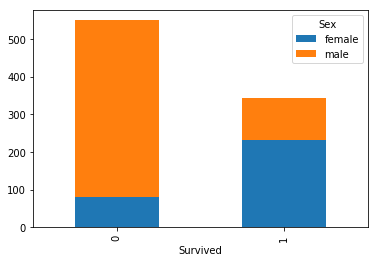

In [5]:
df.groupby(["Survived", "Sex"]).size().unstack().plot.bar(stacked=True)

In [6]:
# import matplotlib
# import matplotlib.cm as cm
# df_m = df.merge(pd.get_dummies(df["Sex"], drop_first=True), on=df.index)

# df_gender_age_color = df_m.groupby(["male", "Age"]).count().loc[:, ["Survived"]].reset_index()

# lst = df_gender_age_color.Survived
# minima = min(lst)
# maxima = max(lst)
# norm = matplotlib.colors.Normalize(vmin=minima, vmax=maxima, clip=True)
# mapper = cm.ScalarMappable(norm=norm, cmap=cm.Greens)
# color = mapper.to_rgba(lst)
    

# df_gender_age_color.plot.scatter(x="male", y="Age", color=color, figsize=(8, 4))

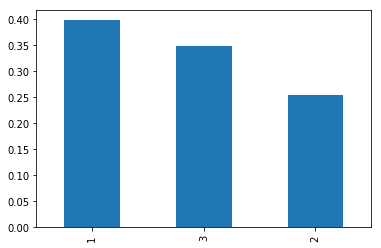

In [7]:
df.Pclass[df["Survived"] == 1].value_counts(normalize=True).plot(kind="bar")

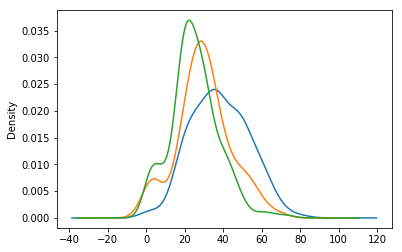

In [8]:
for x in range(1, 4):
    df.Age[df.Pclass == x].plot.kde()

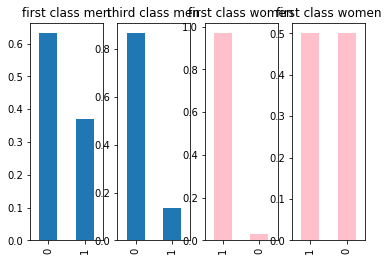

In [9]:
plt.subplot2grid((1, 4), (0, 0))
df.Survived[(df["Sex"] == "male") & (df["Pclass"] == 1)].value_counts(normalize=True).plot.bar(title="first class men")

plt.subplot2grid((1, 4), (0, 1))
df.Survived[(df["Sex"] == "male") & (df["Pclass"] == 3)].value_counts(normalize=True).plot.bar(title="third class men")

plt.subplot2grid((1, 4), (0, 2))
df.Survived[(df["Sex"] == "female") & (df["Pclass"] == 1)].value_counts(normalize=True).plot.bar(title="first class women", color="pink")

plt.subplot2grid((1, 4), (0, 3))
df.Survived[(df["Sex"] == "female") & (df["Pclass"] == 3)].value_counts(normalize=True).plot.bar(title="first class women", color="pink")

In [10]:
df.loc[df["Sex"] == "male", "Sex"] = 0
df.loc[df["Sex"] == "female", "Sex"] = 1

In [11]:
print("Predict by sex, hypothesis: All female survived")
sum((df["Sex"] == df["Survived"]) / len(df.index))

Predict by sex, hypothesis: All female survived


0.786756453423117

In [45]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score
from sklearn import tree

imputer = SimpleImputer()
data = imputer.fit_transform(df.loc[:, ["Survived", "Pclass", "Sex", "Age", "SibSp", "Parch"]])

y = data[:, 0]
X = data[:, 1:]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

des_tree = tree.DecisionTreeClassifier(random_state = 1, max_depth = 5, min_samples_split = 2)
des_tree.fit(X_train, y_train)

scores = cross_val_score(des_tree, X_train, y_train, scoring="accuracy", cv=20)
print(scores.mean())

y_pred = des_tree.predict(X_test)

print('Test accuracy: %.4f' % accuracy_score(y_test, y_pred))

0.8128804855275444
Test accuracy: 0.8324
